In [1]:
import pandas as pd
import numpy as np
import re
import pandas as pd
import csv

In [2]:
from plotnine import *
import folium

In [3]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows' :
    path = "C:\Users\dbeau\Documents\electric_data"
    font_name = font_manager.FontProperties(fname=path).get_name()
else :
    print("Nope")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-3-286a4afbd6b6>, line 6)

In [ ]:
import matplotlib.pyplot as plt
# 그래프 그리는 모듈 matplotlib.pyplot

%matplotlib inline
# 그래프의 결과를  출력 세션에 나타나게 하는 설정

In [ ]:
# 현재 위치정보

%pwd

In [ ]:
# 파일 확인

# %ls /Users/dbeau/Documents/electric_data/
# %ls Documents/electric_data/

%ls C:\Users\dbeau\Documents\electric_data

In [8]:
df = pd.read_excel('power usage by contract type.xls',
                   header = 13,
                  encoding='utf-8')
#df.drop([0], inplace=True)
df.head()

,년월,시구,시군구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
0,201812,강원도,전체,가로등,"115,339","17,303,418","1,869,861,015",108.1
1,201812,강원도,전체,교육용,"1,056","37,950,053","3,793,940,491",100.0
2,201812,강원도,전체,농사용,"103,185","54,322,167","2,781,537,853",51.2
3,201812,강원도,전체,산업용,"13,602","606,504,952","69,111,240,315",114.0
4,201812,강원도,전체,심 야,"90,856","202,859,645","15,192,211,176",74.9


In [9]:
del df['년월']
del df['시군구']
df.head()

,시구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
0,강원도,가로등,"115,339","17,303,418","1,869,861,015",108.1
1,강원도,교육용,"1,056","37,950,053","3,793,940,491",100.0
2,강원도,농사용,"103,185","54,322,167","2,781,537,853",51.2
3,강원도,산업용,"13,602","606,504,952","69,111,240,315",114.0
4,강원도,심 야,"90,856","202,859,645","15,192,211,176",74.9


In [10]:
# 열을 지우거나 usecols 을 사용할 수 있다. 위와 같은 결과값의 명령창


# df = pd.read_excel('power usage by contract type.xls',
#                  header =13,
#                  usecols = 'B,D,E,F,G, H',
                   # df2 = df.reindex(index=df.'시구', columns=['계약구분','고객호수(호)', '사용량(kWh)', 전기요금(원), 평균판매단가(원/kWh)])
#                  encoding='utf-8')
# df.head()

In [11]:
df.tail()

,시구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
135,충청북도,합계,"1,065,629","2,333,639,535","260,938,704,494",111.8
136,황해북도,산업용,4,"183,066","26,747,173",146.1
137,황해북도,일반용,9,"344,108","46,073,444",133.9
138,황해북도,주택용,1,"10,634","1,014,628",95.4
139,황해북도,합계,14,"537,808","73,835,245",137.3


In [12]:
df.describe()

,평균판매단가(원/kWh)
count,140.000000
mean,101.582857
std,26.088937
min,43.100000
25%,94.950000
50%,105.500000
75%,116.850000
max,146.100000


In [13]:
df.describe(include='all')

,시구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
count,140,140,140,140,140,140.000000
unique,18,8,140,140,140,NaN
top,경상북도,주택용,"89,629","273,712,449","26,437,176,836",NaN
freq,8,18,1,1,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,101.582857
std,NaN,NaN,NaN,NaN,NaN,26.088937
min,NaN,NaN,NaN,NaN,NaN,43.100000
25%,NaN,NaN,NaN,NaN,NaN,94.950000
50%,NaN,NaN,NaN,NaN,NaN,105.500000
75%,NaN,NaN,NaN,NaN,NaN,116.850000


In [14]:
df.describe(include=[np.object])

,시구,계약구분,고객호수(호),사용량(kWh),전기요금(원)
count,140,140,140,140,140
unique,18,8,140,140,140
top,경상북도,주택용,"89,629","273,712,449","26,437,176,836"
freq,8,18,1,1,1


In [15]:
#숫자 타입인지 object 타입인지 봐주고 변경해줘야 한다.
# 요약 정보보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 6 columns):
시구               140 non-null object
계약구분             140 non-null object
고객호수(호)          140 non-null object
사용량(kWh)         140 non-null object
전기요금(원)          140 non-null object
평균판매단가(원/kWh)    140 non-null float64
dtypes: float64(1), object(5)
memory usage: 6.6+ KB


In [16]:
df[['시구', '계약구분', '사용량(kWh)']].head(8)

,시구,계약구분,사용량(kWh)
0,강원도,가로등,"17,303,418"
1,강원도,교육용,"37,950,053"
2,강원도,농사용,"54,322,167"
3,강원도,산업용,"606,504,952"
4,강원도,심 야,"202,859,645"
5,강원도,일반용,"414,974,777"
6,강원도,주택용,"183,560,847"
7,강원도,합계,"1,517,475,859"


In [17]:
df.dtypes

시구                object
계약구분              object
고객호수(호)           object
사용량(kWh)          object
전기요금(원)           object
평균판매단가(원/kWh)    float64
dtype: object

In [18]:
# 결측치
df.isnull().sum()

시구               0
계약구분             0
고객호수(호)          0
사용량(kWh)         0
전기요금(원)          0
평균판매단가(원/kWh)    0
dtype: int64

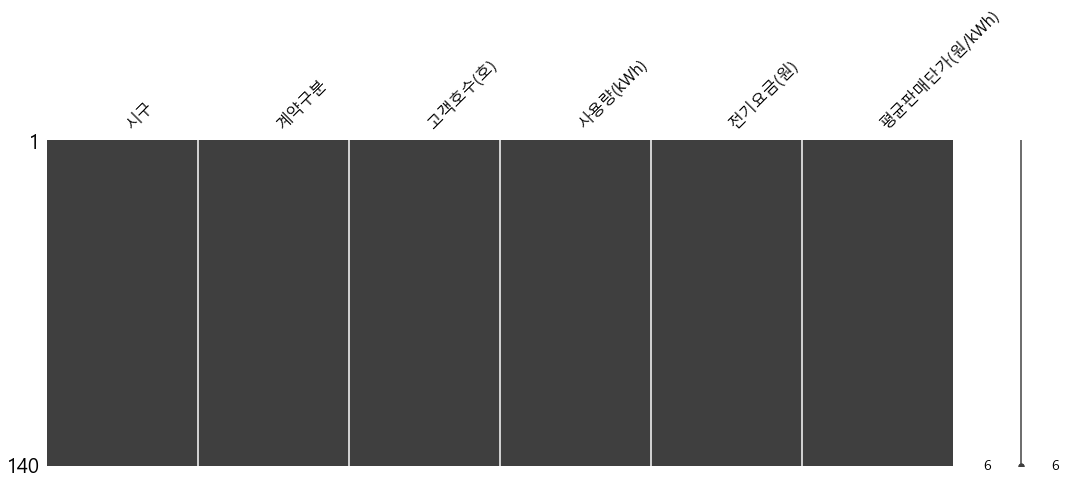

In [43]:
# 결측치 보기
import missingno as msno
msno.matrix(df, figsize=(18,6))

# 결측치 없음

object type 에서 int type 으로 변경해주기

In [20]:
# str 형태로 변경
#df['int type 인 컬럼'] = df['int type 인 컬럼'].astype(str)

In [21]:
def find_int(count):
    i = (re.findall(r'\d+', count))
    ints = int(''.join(map(str, i)))
    return ints

In [22]:
# 고객호수

df['고객호수(호)']= df['고객호수(호)'].map(find_int)

In [23]:
# df['사용량'] = pd.to_numeric(df_use, errors='coerce')
# df['사용량']

df['사용량(kWh)']= df['사용량(kWh)'].map(find_int)

In [24]:
df['전기요금(원)']= df['전기요금(원)'].map(find_int)

In [25]:
df.head()

,시구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
0,강원도,가로등,115339,17303418,1869861015,108.1
1,강원도,교육용,1056,37950053,3793940491,100.0
2,강원도,농사용,103185,54322167,2781537853,51.2
3,강원도,산업용,13602,606504952,69111240315,114.0
4,강원도,심 야,90856,202859645,15192211176,74.9


# Group by

In [55]:
amount_used = pd.DataFrame(df.groupby(['시구']).sum())
amount_used.head()

,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
시구,,,,
강원도,2124000,3034951718,335947078724,799.7
경기도,8965568,21425768930,2501297523692,808.5
경상남도,3778348,6142629324,705407488164,819.9
경상북도,4031450,8033177162,874076966568,787.5
광주광역시,1090960,1433621406,174241618204,823.6


# 지역별 총 사용량 합산

In [56]:
df
df.head()

,시구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
0,강원도,가로등,115339,17303418,1869861015,108.1
1,강원도,교육용,1056,37950053,3793940491,100.0
2,강원도,농사용,103185,54322167,2781537853,51.2
3,강원도,산업용,13602,606504952,69111240315,114.0
4,강원도,심 야,90856,202859645,15192211176,74.9


Groupby

In [57]:
# amount_used groupby 

# 평균사용량(kWh)

amount_used_mean = pd.DataFrame(df.groupby(['시구'])['사용량(kWh)'].mean())

amount_used_mean.head()
# +0.8 가 10의 8승

,사용량(kWh)
시구,
강원도,3.793690e+08
경기도,2.678221e+09
경상남도,7.678287e+08
경상북도,1.004147e+09
광주광역시,1.792027e+08


In [58]:
df

,시구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
0,강원도,가로등,115339,17303418,1869861015,108.1
1,강원도,교육용,1056,37950053,3793940491,100.0
2,강원도,농사용,103185,54322167,2781537853,51.2
3,강원도,산업용,13602,606504952,69111240315,114.0
4,강원도,심 야,90856,202859645,15192211176,74.9
5,강원도,일반용,144941,414974777,55646235021,134.1
6,강원도,주택용,593021,183560847,19578513491,106.7
7,강원도,합계,1062000,1517475859,167973539362,110.7
8,경기도,가로등,344755,80463022,8702695675,108.2
9,경기도,교육용,4457,176724410,17866911242,101.1


In [59]:
df.groupby(['시구'])['사용량(kWh)']

시구
강원도        AxesSubplot(0.125,0.125;0.775x0.755)
경기도        AxesSubplot(0.125,0.125;0.775x0.755)
경상남도       AxesSubplot(0.125,0.125;0.775x0.755)
경상북도       AxesSubplot(0.125,0.125;0.775x0.755)
광주광역시      AxesSubplot(0.125,0.125;0.775x0.755)
대구광역시      AxesSubplot(0.125,0.125;0.775x0.755)
대전광역시      AxesSubplot(0.125,0.125;0.775x0.755)
부산광역시      AxesSubplot(0.125,0.125;0.775x0.755)
서울특별시      AxesSubplot(0.125,0.125;0.775x0.755)
세종특별자치시    AxesSubplot(0.125,0.125;0.775x0.755)
울산광역시      AxesSubplot(0.125,0.125;0.775x0.755)
인천광역시      AxesSubplot(0.125,0.125;0.775x0.755)
전라남도       AxesSubplot(0.125,0.125;0.775x0.755)
전라북도       AxesSubplot(0.125,0.125;0.775x0.755)
제주특별자치도    AxesSubplot(0.125,0.125;0.775x0.755)
충청남도       AxesSubplot(0.125,0.125;0.775x0.755)
충청북도       AxesSubplot(0.125,0.125;0.775x0.755)
황해북도       AxesSubplot(0.125,0.125;0.775x0.755)
Name: 사용량(kWh), dtype: object

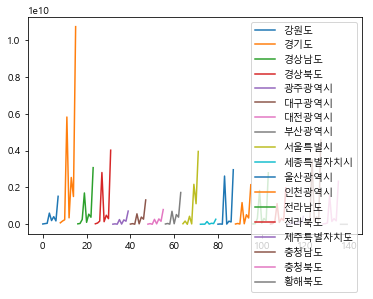

In [60]:
#df.set_index('시구',inplace=True)
df.groupby(['시구'])['사용량(kWh)'].plot(legend=True)

In [61]:
amount_used

,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
시구,,,,
강원도,2124000,3034951718,335947078724,799.7
경기도,8965568,21425768930,2501297523692,808.5
경상남도,3778348,6142629324,705407488164,819.9
경상북도,4031450,8033177162,874076966568,787.5
광주광역시,1090960,1433621406,174241618204,823.6
대구광역시,1882796,2640241900,317728492152,816.8
대전광역시,1169706,1600092064,189825341252,807.2
부산광역시,2564390,3447113542,425735246164,834.7
서울특별시,7210600,7898475280,993033578144,836.4


In [113]:
import matplotlib as mpl           # 그래프를 그리는 모듈
import matplotlib.pyplot as plt    # 그래프를 그리는 모듈
# 한글 폰트 설정
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

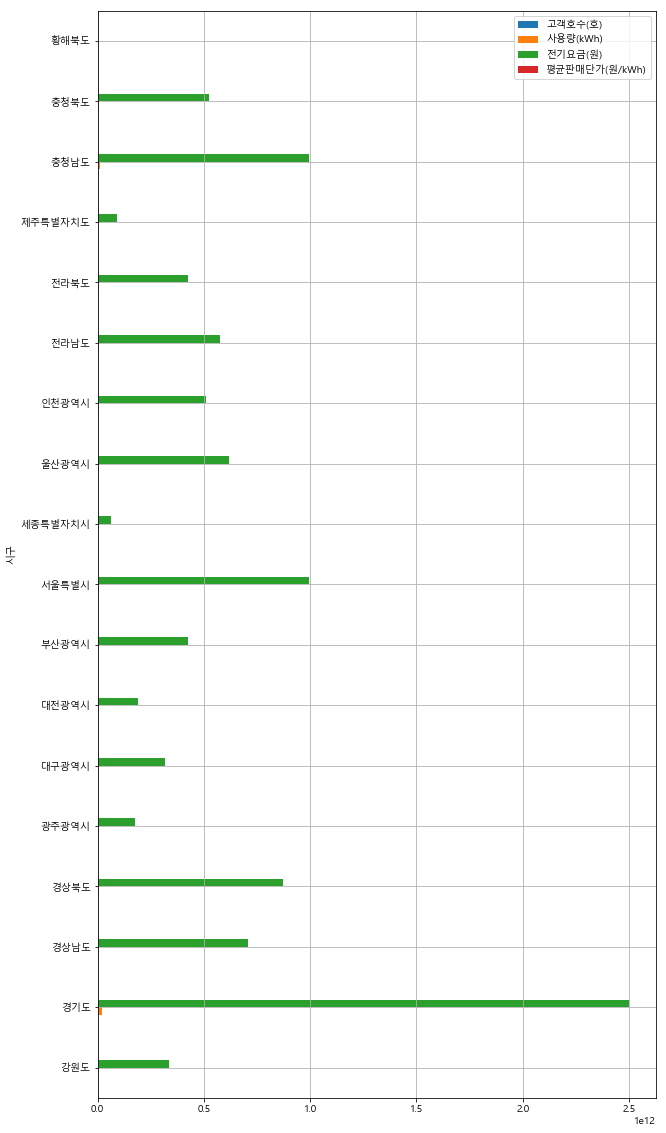

In [63]:
#amount_used.set_index('시구', inplace=True)
amount_used.plot(kind='barh', grid=True, figsize = (10,20))

In [77]:
# 지역별 총 사용량(kWh)
r
amount_used=pd.DataFrame(df.groupby(['시구'])['사용량(kWh)'].sum())

In [78]:
amount_used.reindex()

,사용량(kWh)
시구,
강원도,3034951718
경기도,21425768930
경상남도,6142629324
경상북도,8033177162
광주광역시,1433621406
대구광역시,2640241900
대전광역시,1600092064
부산광역시,3447113542
서울특별시,7898475280


In [79]:
amount_used.rename(columns={'사용량(kWh)' : '총사용량(kWh)'}, 
                   inplace=True)
amount_used.head()

,총사용량(kWh)
시구,
강원도,3034951718
경기도,21425768930
경상남도,6142629324
경상북도,8033177162
광주광역시,1433621406


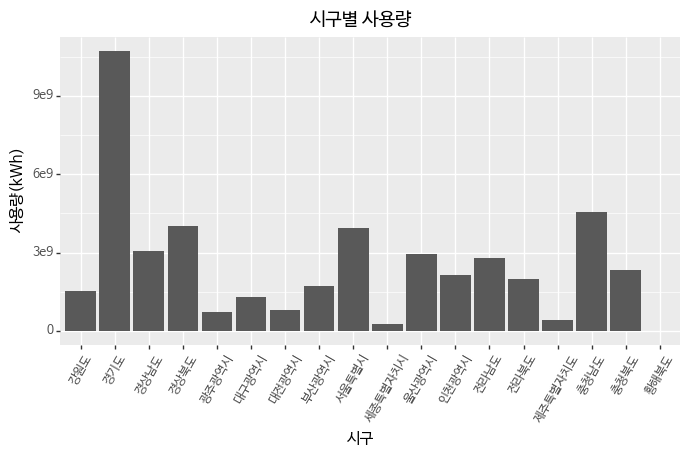

<ggplot: (-9223371917159812941)>

In [80]:
(ggplot(df)
 + aes(x='시구', y='사용량(kWh)')
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('시구별 사용량')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60), 
        figure_size=(8, 4))
)

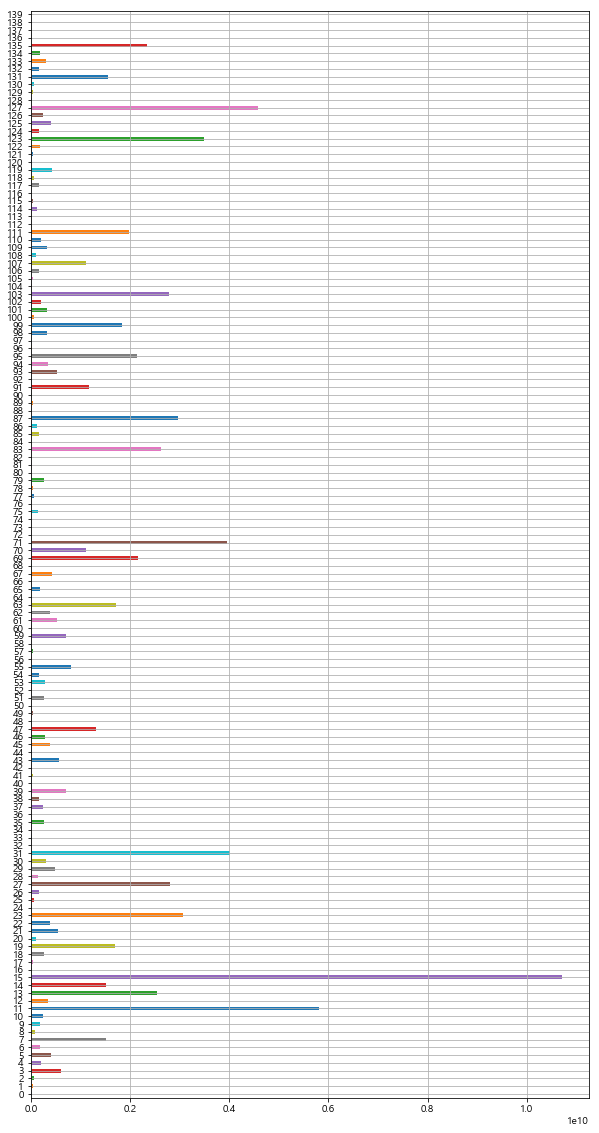

In [81]:
df['사용량(kWh)'].plot(kind='barh', grid=True, figsize = (10,20))
plt.show()

In [82]:
plt?

In [85]:
# 총 사용량 순서로 보기

amount_used.sort_values(by='총사용량(kWh)', ascending=True). head()

,총사용량(kWh)
시구,
황해북도,1075616
세종특별자치시,547424898
제주특별자치도,866390494
광주광역시,1433621406
대전광역시,1600092064


# 지역별 총 고객호수 합산

In [87]:
df.head()

,시구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
0,강원도,가로등,115339,17303418,1869861015,108.1
1,강원도,교육용,1056,37950053,3793940491,100.0
2,강원도,농사용,103185,54322167,2781537853,51.2
3,강원도,산업용,13602,606504952,69111240315,114.0
4,강원도,심 야,90856,202859645,15192211176,74.9


In [88]:
df.tail()

,시구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
135,충청북도,합계,1065629,2333639535,260938704494,111.8
136,황해북도,산업용,4,183066,26747173,146.1
137,황해북도,일반용,9,344108,46073444,133.9
138,황해북도,주택용,1,10634,1014628,95.4
139,황해북도,합계,14,537808,73835245,137.3


In [94]:
cus = pd.DataFrame(df.groupby(['시구'])['고객호수(호)'].sum())
cus

,고객호수(호)
시구,
강원도,2124000
경기도,8965568
경상남도,3778348
경상북도,4031450
광주광역시,1090960
대구광역시,1882796
대전광역시,1169706
부산광역시,2564390
서울특별시,7210600


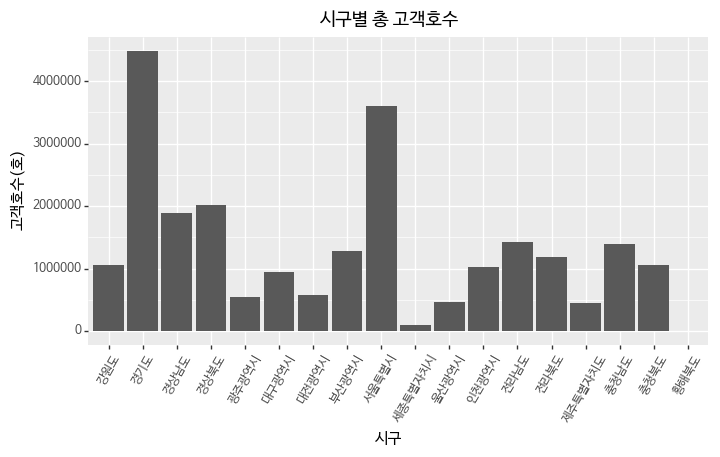

<ggplot: (-9223371917159687101)>

In [98]:
(ggplot(df)
 + aes(x='시구', y='고객호수(호)')
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('시구별 총 고객호수')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60), 
        figure_size=(8, 4))
)

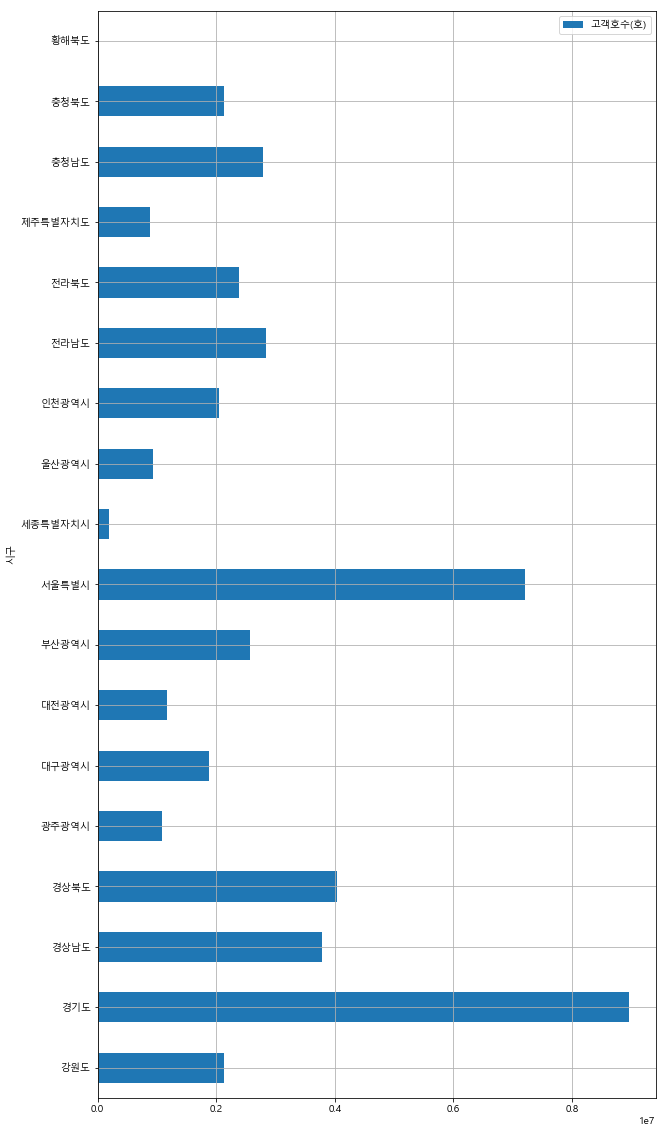

In [101]:
cus.plot(kind='barh', grid=True, figsize = (10,20))

# 지역별 평균 호수별 사용량

In [103]:
df.head()

,시구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
0,강원도,가로등,115339,17303418,1869861015,108.1
1,강원도,교육용,1056,37950053,3793940491,100.0
2,강원도,농사용,103185,54322167,2781537853,51.2
3,강원도,산업용,13602,606504952,69111240315,114.0
4,강원도,심 야,90856,202859645,15192211176,74.9


In [104]:
sum = pd.DataFrame(df.groupby(['시구']).sum())
sum.head()

,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
시구,,,,
강원도,2124000,3034951718,335947078724,799.7
경기도,8965568,21425768930,2501297523692,808.5
경상남도,3778348,6142629324,705407488164,819.9
경상북도,4031450,8033177162,874076966568,787.5
광주광역시,1090960,1433621406,174241618204,823.6


In [106]:
sum['평균 호수별 사용량'] = sum['사용량(kWh)'] / sum['고객호수(호)']
sum.head()

,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh),평균 호수별 사용량
시구,,,,,
강원도,2124000,3034951718,335947078724,799.7,1428.884990
경기도,8965568,21425768930,2501297523692,808.5,2389.783774
경상남도,3778348,6142629324,705407488164,819.9,1625.744723
경상북도,4031450,8033177162,874076966568,787.5,1992.627259
광주광역시,1090960,1433621406,174241618204,823.6,1314.091631


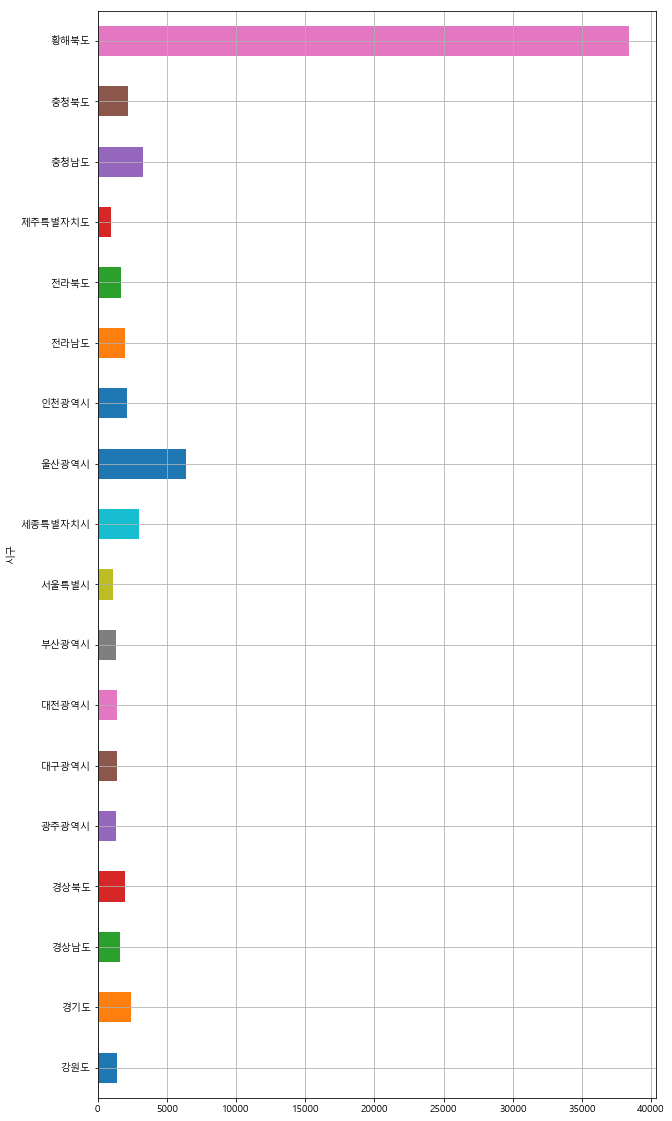

In [108]:
sum['평균 호수별 사용량'].plot(kind='barh', grid=True, figsize = (10,20))